In [1]:
import numpy
import random
import numpy as np
import pandas as pd
from math import sqrt

import matplotlib.image as img
from PIL import Image

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import Image

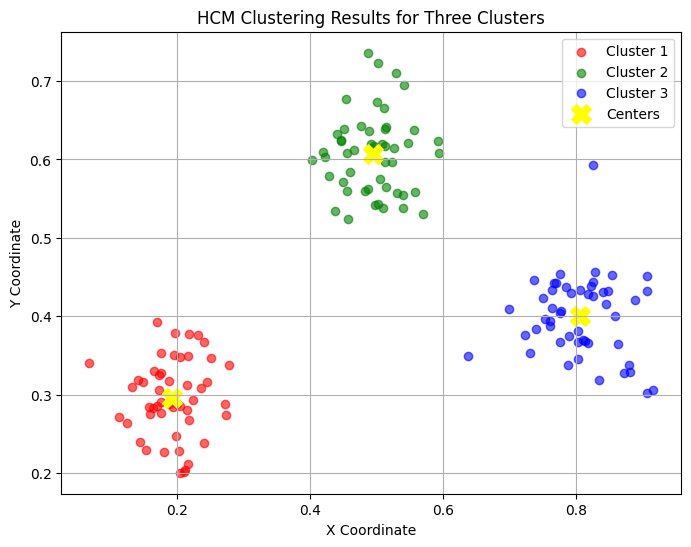

In [3]:
# Define parameters and functions again, I also set 42 as the seed to have the same result
groups = 3
error_margin = 0.01
m = 2
np.random.seed(42)

# Generate synthetic dataset
data_set = np.vstack((
    np.random.normal(loc=[0.2, 0.3], scale=0.05, size=(50, 2)),
    np.random.normal(loc=[0.5, 0.6], scale=0.05, size=(50, 2)),
    np.random.normal(loc=[0.8, 0.4], scale=0.05, size=(50, 2))
))

assignation = np.zeros((len(data_set), groups))
centers = np.array([[0.01229673, 0.25183492],
                    [0.3689626 , 0.61904127],
                    [0.95732769, 0.45059586]])

def calculate_distance(x, v):
    return sqrt((x[0] - v[0])**2 + (x[1] - v[1])**2)

def calculate_new_centers(u):
    new_centers = []
    for c in range(groups):
        u_x_vector = np.zeros(2)
        u_scalar = 0.0
        for i in range(len(data_set)):
            u_scalar += u[i][c]**m
            u_x_vector = np.add(u_x_vector, np.multiply(u[i][c]**m, data_set[i]))
        new_centers.append(np.divide(u_x_vector, u_scalar))
    return new_centers

def calculate_differences(new_assignation, assignation):     
    return np.sum(np.abs(np.subtract(assignation, new_assignation)))

def calculate_u_three(x):
    u_array = np.zeros(groups)
    minimal_distance = []
    for group in range(groups):
        minimal_distance.append(calculate_distance(x, centers[group]))
    min_group_id = np.argmin(minimal_distance)
    u_array[min_group_id] = 1
    return u_array

def cluster_hcm(assignation, centers):
    difference_limit_not_achieved = True
    iter = 0
    while difference_limit_not_achieved:
        new_assignation = []
        for i in range(len(data_set)):
            new_assignation.append(calculate_u_three(data_set[i]))
        new_centers = calculate_new_centers(new_assignation)
        if iter > 0:
            if calculate_differences(new_assignation, assignation) < error_margin:
                difference_limit_not_achieved = False
        assignation = new_assignation
        iter += 1
    return new_assignation, new_centers

# Execute clustering
new_assignation_hcm3, new_centers_hcm3 = cluster_hcm(assignation, centers)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for idx, color in enumerate(colors):
    cluster_points = data_set[np.array(new_assignation_hcm3)[:, idx] == 1]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {idx + 1}', alpha=0.6)
    
# Plot centers
new_centers_hcm3 = np.array(new_centers_hcm3)
ax.scatter(new_centers_hcm3[:, 0], new_centers_hcm3[:, 1], c='yellow', label='Centers', marker='X', s=200)

ax.legend()
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('HCM Clustering Results for Three Clusters')
plt.grid(True)
plt.show()
